# Introduction to Data Science (LTAT.02.002)

# Project: House Prices - Advanced Regression Techniques

#### Team: Hendrik Suvalov, Raul Tölp

**Description**:
* Kaggle competition: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/rules
* Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Goals: 
* what influences the house price
* predict final price with Linear Regression or Random Forest model
 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn import linear_model
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.model_selection import train_test_split

# Resize Colab results view
from IPython.display import Javascript
pd.set_option('max_rows', 99999)
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

# Andmete sisselugemine ja uurimine

In [ ]:
# Andmetabeli üldkuju
df = pd.read_csv("train.csv", sep=',') # eelnevalt lae andmed colabi Files ikoon->Upload
df_test = pd.read_csv("test.csv", sep=',') # eelnevalt lae andmed colabi Files ikoon->Upload
df.head()

<IPython.core.display.Javascript object>

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Tabeli mõõtmed
df.shape, df_test.shape

<IPython.core.display.Javascript object>

((1460, 81), (1459, 80))

In [ ]:
# Tabeli tulpade tüübid
df.info()

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Tabeli tulpade statistilised andmed
df.describe(include='all')

<IPython.core.display.Javascript object>

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,...,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,...,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,...,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,...,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,...,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,...,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN,0.0

In [ ]:
# SalePrice korrelatsioon numbriliste tulpadega
SalePriceKorrelatsioon = df.drop(columns='SalePrice').corrwith(df.SalePrice).sort_values(ascending=False)
SalePriceKorrelatsioon

<IPython.core.display.Javascript object>

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64

<IPython.core.display.Javascript object>

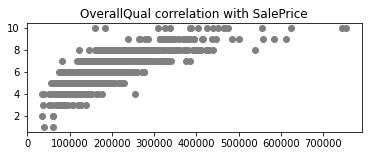

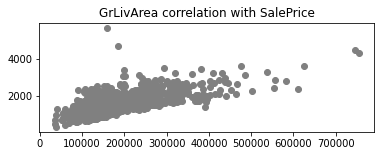

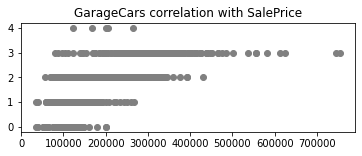

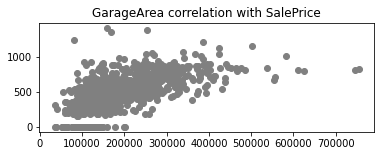

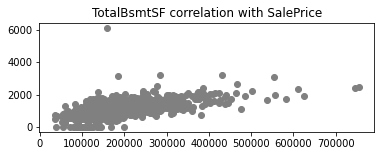

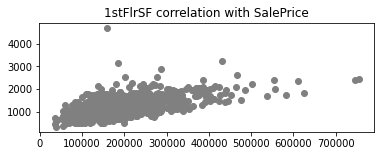

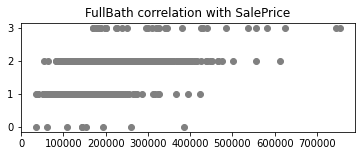

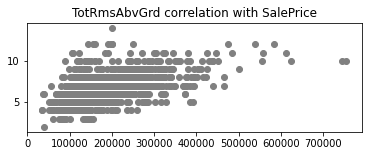

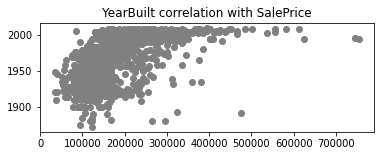

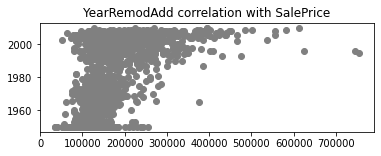

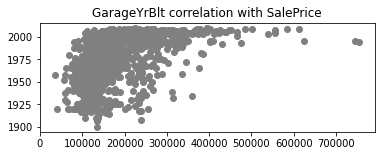

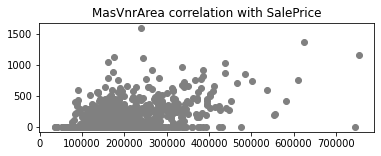

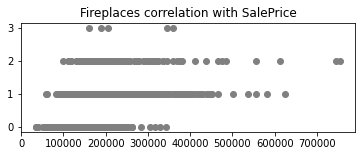

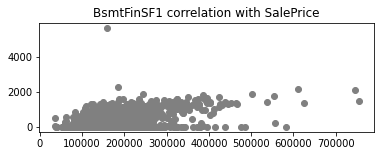

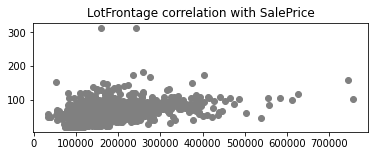

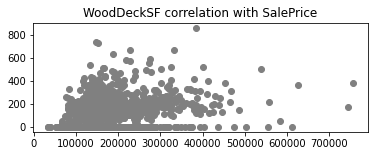

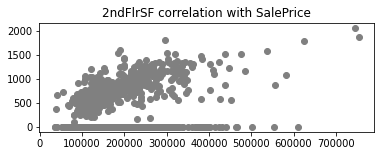

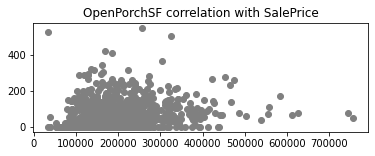

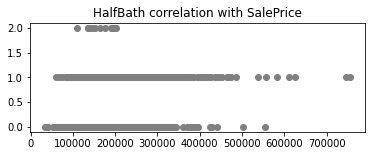

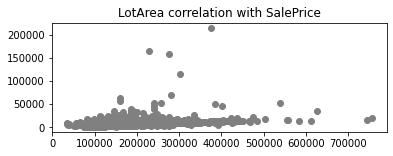

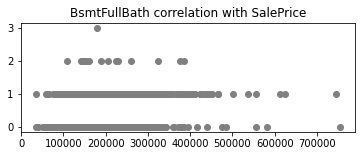

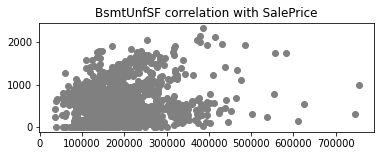

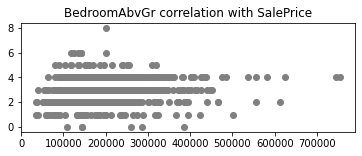

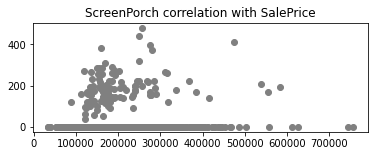

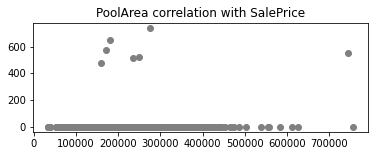

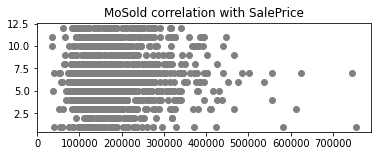

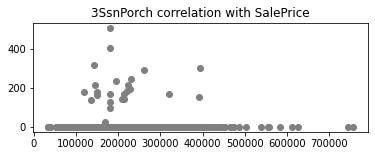

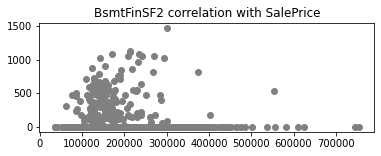

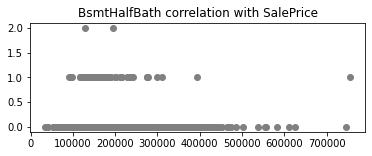

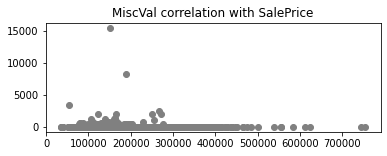

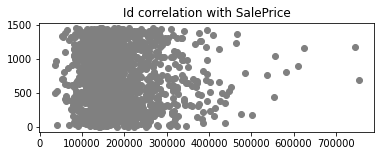

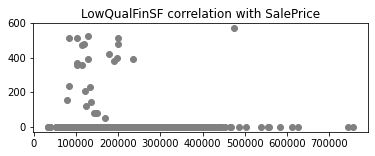

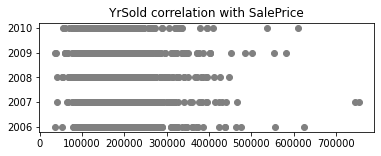

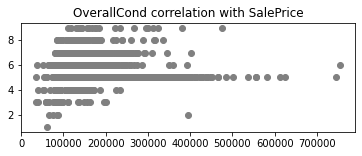

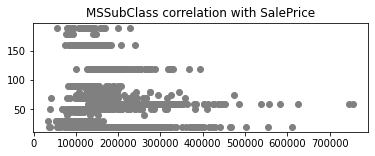

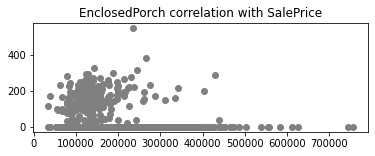

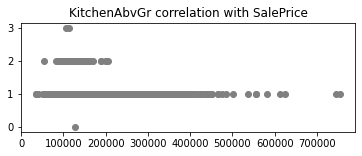

In [ ]:
# Andmete omavaheliste seoste ülevaate saamiseks
# sns.pairplot(df, corner=True)

# Ainult SalePrice võrdlus teiste tulpadega
# sns.pairplot(data=df, x_vars=['SalePrice'], y_vars=df.drop(columns='SalePrice'))

# SalePrice korrelatsioonide järjestatud võrdlused
for k in SalePriceKorrelatsioon.keys():
    plt.figure(figsize=(6,2))
    plt.scatter(df.SalePrice, df[k], c='gray')
    plt.title(k + " correlation with SalePrice")
    # plt.xticks([])
    # plt.yticks([])
    plt.show()

In [ ]:
# Unikaalsete tunnuste arv tulpades
df.nunique()

<IPython.core.display.Javascript object>

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

# Andmete eeltöötlus

In [ ]:
# Kas on andmeid puudu
df.isna().sum()
# df.rida.dropna() # juhuks kui mingi andmed osutuvad ebaoluliseks või hakkavad segama hilisemat analüüsi

<IPython.core.display.Javascript object>

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
# Kas on korduvaid ridu
df.duplicated().sum()

<IPython.core.display.Javascript object>

0

In [ ]:
# Muudame tulpade admetüübid sobivaks kategooriaks
# df.tulp = df.tulp.astype('category')
# df.tulp = df.tulp.astype('int')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Kontroll
df.dtypes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [ ]:
# teeme parandatud tabelist varukoopia
df_varukoopia = df.copy()

<IPython.core.display.Javascript object>

In [ ]:
df['label'] = 'train'
df_test['label'] = 'test'

<IPython.core.display.Javascript object>

In [ ]:
df_combined = pd.concat([df, df_test])
df_combined = df_combined.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [ ]:
print(df_combined[df_combined['label'] == 'train'][:5])
print(df_combined[df_combined['label'] == 'test'][:5])

<IPython.core.display.Javascript object>

   Id  MSSubClass MSZoning  ...  SaleCondition  SalePrice  label
0   1          60       RL  ...         Normal   208500.0  train
1   2          20       RL  ...         Normal   181500.0  train
2   3          60       RL  ...         Normal   223500.0  train
3   4          70       RL  ...        Abnorml   140000.0  train
4   5          60       RL  ...         Normal   250000.0  train

[5 rows x 82 columns]
        Id  MSSubClass MSZoning  ...  SaleCondition  SalePrice label
1460  1461          20       RH  ...         Normal        NaN  test
1461  1462          20       RL  ...         Normal        NaN  test
1462  1463          60       RL  ...         Normal        NaN  test
1463  1464          60       RL  ...         Normal        NaN  test
1464  1465         120       RL  ...         Normal        NaN  test

[5 rows x 82 columns]


In [ ]:
# Tabel muudetud kujul
df_combined.shape

<IPython.core.display.Javascript object>

(2919, 82)

### Feature engineering

#### Judging from the SNS plots, it seems that fireplace, basement and garage are good indicators of price, however, in many cases of their features (e.g. BsmtQual, BsmtCond e.t.c) the NaN actually represents "No basement" not that data is missing or anything, so we shouldn't fill the NaNs with mod but actually use it as seperate value. Kinda stupid data tbh. 

In [ ]:
NanToNone = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 
             'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
             'GarageType', 'GarageFinish', 'GarageQual', 
             'GarageCond', 'MiscFeature', 'Fence', 'PoolQC']

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def feature_eng(df):

  labels = df['label']
  df = df.drop('label', axis=1)

  # Too many NaN values
  df = df.drop(['Alley'], axis=1) # pretty much only null values here

  df[NanToNone] = df[NanToNone].replace({np.nan: 'None'})

  numerical_columns = df.select_dtypes(include=['int64', 'float64'])
  categorical_columns = df.select_dtypes(exclude=['int64', 'float64'])

  numerical_columns = numerical_columns.fillna(numerical_columns.mean())
  # could replace with most frequent but i would argue it might give wrong info to model
  # categorical_columns = categorical_columns.fillna(categorical_columns.mode().iloc[0])
  categorical_columns = categorical_columns.fillna('nan')

  scaler = MinMaxScaler()
  numerical_columns = pd.DataFrame(scaler.fit_transform(numerical_columns), columns=numerical_columns.columns)

  one_hot = pd.get_dummies(categorical_columns)

  df_feat = pd.concat([numerical_columns, one_hot], 1)

  df_feat['label'] = labels

  return df_feat

<IPython.core.display.Javascript object>

In [ ]:
df.columns

<IPython.core.display.Javascript object>

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
SalePrices = df_combined['SalePrice']
df_feat = df_combined.drop('SalePrice', axis=1)
df_feat = df_feat.drop('Id', axis=1)

<IPython.core.display.Javascript object>

In [ ]:
df_feat.shape

<IPython.core.display.Javascript object>

(2919, 80)

In [ ]:
df_feat = feature_eng(df_feat)

<IPython.core.display.Javascript object>

In [ ]:
print(df_feat[df_feat['label'] == 'train'][:5])
print(df_feat[df_feat['label'] == 'test'][:5])

<IPython.core.display.Javascript object>

   MSSubClass  LotFrontage  ...  SaleCondition_Partial  label
0    0.235294     0.150685  ...                      0  train
1    0.000000     0.202055  ...                      0  train
2    0.235294     0.160959  ...                      0  train
3    0.294118     0.133562  ...                      0  train
4    0.235294     0.215753  ...                      0  train

[5 rows x 309 columns]
      MSSubClass  LotFrontage  ...  SaleCondition_Partial  label
1460    0.000000     0.202055  ...                      0   test
1461    0.000000     0.205479  ...                      0   test
1462    0.235294     0.181507  ...                      0   test
1463    0.235294     0.195205  ...                      0   test
1464    0.588235     0.075342  ...                      0   test

[5 rows x 309 columns]


In [ ]:
# adding Saleprices back

df_feat = pd.concat([df_feat, SalePrices], 1)

df_feat.head(5)

<IPython.core.display.Javascript object>

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,label,SalePrice
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.109641,0.413559,0.0,0.259231,0.333333,0.0,0.50,0.5,0.375,0.333333,0.461538,0.00,0.346154,0.4,0.368280,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,train,208500.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,0.206547,0.194917,0.000000,0.0,0.174830,0.000000,0.5,0.50,0.0,0.375,0.333333,0.307692,0.25,0.259615,0.4,0.309140,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,train,181500.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,0.150573,0.123083,0.419370,0.0,0.273549,0.333333,0.0,0.50,0.5,0.375,0.333333,0.307692,0.25,0.339744,0.4,0.408602,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,train,223500.0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,0.123732,0.131695,0.366102,0.0,0.260550,0.333333,0.0,0.25,0.0,0.375,0.333333,0.384615,0.25,0.330128,0.6,0.431452,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.0,0.090909,0.00,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,train,140000.0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,0.187398,0.170342,0.509927,0.0,0.351168,0.333333,0.0,0.50,0.5,0.500,0.333333,0.538462,0.25,0.336538,0.6,0.561828,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,train,250000.0


In [ ]:
print(df_feat[df_feat['label'] == 'train'][:5])
print(df_feat[df_feat['label'] == 'test'][:5])

<IPython.core.display.Javascript object>

   MSSubClass  LotFrontage   LotArea  ...  SaleCondition_Partial  label  SalePrice
0    0.235294     0.150685  0.033420  ...                      0  train   208500.0
1    0.000000     0.202055  0.038795  ...                      0  train   181500.0
2    0.235294     0.160959  0.046507  ...                      0  train   223500.0
3    0.294118     0.133562  0.038561  ...                      0  train   140000.0
4    0.235294     0.215753  0.060576  ...                      0  train   250000.0

[5 rows x 310 columns]
      MSSubClass  LotFrontage  ...  label  SalePrice
1460    0.000000     0.202055  ...   test        NaN
1461    0.000000     0.205479  ...   test        NaN
1462    0.235294     0.181507  ...   test        NaN
1463    0.235294     0.195205  ...   test        NaN
1464    0.588235     0.075342  ...   test        NaN

[5 rows x 310 columns]


In [ ]:
X_train = df_feat[df_feat['label'] == 'train'].drop(['SalePrice', 'label'], axis=1)
y_train = df_feat[df_feat['label'] == 'train']['SalePrice']

<IPython.core.display.Javascript object>

In [ ]:
X_test = df_feat[df_feat['label'] == 'test'].drop(['SalePrice', 'label'], axis=1)

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import train_test_split


# kind of ebavajalik RMSE suhtes vähemalt linregress ja RF-iga
# X = normalize(X)

# Siit tuleb praeguse seisuga välja, et ikka mida rohkem featureid, seda uhkem

# good_features = [i[0] for i in sorted(X.corrwith(y).items(), key=lambda p:p[1], reverse=True)][:60]
# X = X[good_features]


# mudel = LinearRegressionMudel(X, y)
# mudel_RF = RandomForestClassifierMudel(X, y)
# mudel_Ridge = RidgeMudel(X, y)
# mudel_lasso = LassoMudel(X, y) # 26462
# mudel_GBC = GBCmudel(X, y) # n_estimators 100, learning rate 1, max_depth 3 annab RMSE 86521.334259781 mis on suht halb
# mudel_XGB = XGBmudel(X, y)
mudel_RFReg = RFRegressor(X_train, y_train)

<IPython.core.display.Javascript object>

RFRegressor rmse: 30955.797201705987


In [ ]:
# print(mudel.predict(X).min(), mudel.predict(X).mean(), mudel.predict(X).max())
# print(mudel_RF.predict(X).min(), mudel_RF.predict(X).mean(), mudel_RF.predict(X).max()) # Kaggle - 0.22275
# print(mudel_Ridge.predict(X).min(), mudel_Ridge.predict(X).mean(), mudel_Ridge.predict(X).max())
# print(mudel_lasso.predict(X).min(), mudel_lasso.predict(X).mean(), mudel_lasso.predict(X).max()) # Kaggle - 0.19229
print(mudel_RFReg.predict(X_test).min(), mudel_RFReg.predict(X_test).mean(), mudel_RFReg.predict(X_test).max()) # Kaggle - 0.17144

<IPython.core.display.Javascript object>

71169.53309808075 179435.25519976663 449531.2164810174


In [ ]:
# SalePrices = df['SalePrice']

# preds_RF = mudel_RF.predict(X_test)
# preds_Ridge = mudel_Ridge.predict(X_test)
# preds_Lasso = mudel_lasso.predict(X_test)
preds_RFReg = mudel_RFReg.predict(X_test)

<IPython.core.display.Javascript object>

In [ ]:
generate_solutions_csv(preds_RFReg, "preds_RFReg.csv") # Kaggle - 0.15433, best so far, lets tune parameters

<IPython.core.display.Javascript object>

In [ ]:
# training XGBRegressor seperately  since it takes a lot of time
model_XGBR = xgb.XGBRegressor(verbosity=0, n_estimators=500, random_state=0, objective='reg:squarederror') 
model_XGBR.fit(X, y)

preds_XGBR = model_XGBR.predict(df_test_)
generate_solutions_csv(preds_XGBR, "preds_XGBR.csv")

<IPython.core.display.Javascript object>

In [ ]:
preds_XGBR.max()

<IPython.core.display.Javascript object>

490194.6

In [ ]:
print(preds_RF.min(), preds_RF.mean(), preds_RF.max())
print(preds_Ridge.min(), preds_Ridge.mean(), preds_Ridge.max()) # wtf
print(preds_Lasso.min(), preds_Lasso.mean(), preds_Lasso.max())
print(preds_RFReg.min(), preds_RFReg.mean(), preds_RFReg.max())

# generate_solutions_csv(preds_RF, "RF.csv") # Kaggle - 0.22275
# generate_solutions_csv(preds_Lasso, "lasso.csv") # Kaggle - 0.19229
# generate_solutions_csv(preds_RFReg, "RFREF.csv") # # Kaggle - 0.17144

<IPython.core.display.Javascript object>

35311 164968.98355037696 385000
-9.890283005642707e+18 1.4943700559189e+19 3.847603245716279e+19
-1015892.7941325273 -135604.6778712146 569609.8564413558
112962.25049262629 195518.46176544807 325574.35590881016


### Looks like Random Forest Regressor gave us the best results, we should try to tune the parameters to get the best model possible

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import RandomizedSearchCV



n_estimators = [500, 1000, 2000, 5000]
max_features = ['auto', 'sqrt']
max_depth = [5, 10, 40, 60, None]
min_samples_split = [2, 4, 6]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
    
model = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=0, n_jobs = -1)
rf_random.fit(X_train, y_train)

# preds = model.predict(X_test)
# mse = mean_squared_error(preds, y_test, squared=False)

# print("RFRegressor rmse:", mse)

<IPython.core.display.Javascript object>

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 40, 60, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [500, 1000, 2000,
                                                         5000]},
                   random_state=0, verbose=2)

-------------

In [ ]:
rf_random.best_params_

<IPython.core.display.Javascript object>

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 500}

### Oke let's use these params to make the model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(bootstrap=False, max_depth = 60, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 6, n_estimators = 500)
model.fit(X_train, y_train)


<IPython.core.display.Javascript object>

RandomForestRegressor(bootstrap=False, max_depth=60, max_features='sqrt',
                      min_samples_split=6, n_estimators=500)

In [ ]:
predictz = model.predict(X_test)

<IPython.core.display.Javascript object>

In [ ]:
generate_solutions_csv(predictz, "rftuned.csv") # 0.15043

<IPython.core.display.Javascript object>

In [ ]:
# GBC = GBCmudel(X_train, y_train)
XGB = XGBmudel(X_train, y_train)

<IPython.core.display.Javascript object>

In [ ]:
GBCpredz = GBC.predict(X_test)
XGBpredz = XGB.predict(X_test)

<IPython.core.display.Javascript object>

In [ ]:
generate_solutions_csv(XGBpredz, "xgbpredz.csv") # Even better, Kaggle - 0.13480

<IPython.core.display.Javascript object>

### XGB regressor is even better, lets tune its parameters

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import RandomizedSearchCV


xgb_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

params = {"objective":"reg:squarederror", "max_depth": 3}

num_rounds = [i*5 for i in range(5, 25)]

rmse_per_round = []

for current_rounds in num_rounds:
  cv_results = xgb.cv(dtrain=xgb_dmatrix, params=params, nfold=3, num_boost_round=current_rounds, metrics='rmse', as_pandas=True, seed=0, early_stopping_rounds=10)

  rmse_per_round.append(cv_results['test-rmse-mean'].tail().values[-1])

num_rounds_rmses = list(zip(num_rounds, rmse_per_round))
print(pd.DataFrame(num_rounds_rmses, columns=['num_boosting_rounds', 'rmse']))


<IPython.core.display.Javascript object>

    num_boosting_rounds          rmse
0                    25  29174.451823
1                    30  28879.666016
2                    35  28573.732422
3                    40  28328.024740
4                    45  28151.632812
5                    50  28132.682943
6                    55  28135.531901
7                    60  28104.733073
8                    65  27880.847656
9                    70  27849.471354
10                   75  27869.350261
11                   80  27910.766927
12                   85  27835.681641
13                   90  27835.681641
14                   95  27835.681641
15                  100  27835.681641
16                  105  27835.681641
17                  110  27835.681641
18                  115  27835.681641
19                  120  27835.681641


In [ ]:
# num_rounds = 60

In [ ]:
eta_vals = [0.001, 0.01, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75]
best_rmse = []

for current_val in eta_vals:
  params['eta'] = current_val
  cv_results = xgb.cv(dtrain=xgb_dmatrix, params=params, nfold=3, num_boost_round=60, metrics='rmse', as_pandas=True, seed=0, early_stopping_rounds=10)

  best_rmse.append(cv_results['test-rmse-mean'].tail().values[-1])


print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=['eta', 'best_rmse']))


<IPython.core.display.Javascript object>

     eta      best_rmse
0  0.001  186761.171875
1  0.010  114167.513021
2  0.100   29224.860677
3  0.150   28509.699870
4  0.200   28020.438151
5  0.250   28257.976562
6  0.500   31269.542318
7  0.750   32810.936198


In [ ]:
# num_rounds = 60
# eta = 0.2 

In [ ]:
max_depths = [1, 2, 5, 7, 10, 15, 20]
best_rmse = []

for depth in max_depths:
  params['max_depth'] = depth
  params['eta'] = 0.2

  cv_results = xgb.cv(dtrain=xgb_dmatrix, params=params, nfold=3, num_boost_round=60, metrics='rmse', as_pandas=True, seed=0, early_stopping_rounds=10)

  best_rmse.append(cv_results['test-rmse-mean'].tail().values[-1])

print(pd.DataFrame(list(zip(max_depths, best_rmse)), columns=['max_depth', 'best_rmse']))

<IPython.core.display.Javascript object>

   max_depth     best_rmse
0          1  32675.861979
1          2  29656.205078
2          5  29529.414062
3          7  29662.593750
4         10  29773.156250
5         15  29921.185547
6         20  30292.160807


In [ ]:
# num_rounds = 60
# eta = 0.2 
# max_depth = 5

In [ ]:
colsample_bytree_vals = [0.1, 0.25, 0.5, 0.75, 1]
best_rmse = []

for colsample_byt in colsample_bytree_vals:
  params['max_depth'] = depth
  params['eta'] = 0.2
  params['max_depth'] = 5
  params['colsample_bytree'] = colsample_byt

  cv_results = xgb.cv(dtrain=xgb_dmatrix, params=params, nfold=3, num_boost_round=60, metrics='rmse', as_pandas=True, seed=0, early_stopping_rounds=10)

  best_rmse.append(cv_results['test-rmse-mean'].tail().values[-1])

print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=['colsample_bytree', 'best_rmse']))

<IPython.core.display.Javascript object>

   colsample_bytree     best_rmse
0              0.10  30177.260417
1              0.25  30640.776042
2              0.50  29745.800781
3              0.75  30011.934896
4              1.00  29529.414062


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'colsample_bytree': [1],
    'max_depth': [5],
    'eta': [0.2],
    'n_estimators': [100, 200, 500, 750, 1000],
    'max_depth': [5],
    'objective': ['reg:squarederror']
}

XGBReg = xgb.XGBRegressor()

grid_mse = GridSearchCV(param_grid=param_grid, estimator=XGBReg, scoring='neg_mean_squared_error', cv=4, verbose=1)

grid_mse.fit(X_train, y_train)

print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

<IPython.core.display.Javascript object>

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Best parameters found:  {'colsample_bytree': 1, 'eta': 0.2, 'max_depth': 5, 'n_estimators': 500, 'objective': 'reg:squarederror'}
Lowest RMSE found:  27666.533428019407


In [ ]:
# num_rounds = 60
# eta = 0.2 
# max_depth = 5
# colsample_bytree = 1

import xgboost as xgb

model = xgb.XGBRegressor(colsample_bytree=1, max_depth=5, learning_rate=0.15, n_estimators=500, objective='reg:squarederror', seed=43) 
model.fit(X_train, y_train)

predzi = model.predict(X_test)

print(predzi.min(), predzi.mean(), predzi.max())

generate_solutions_csv(predzi, "XGBoostTuned.csv") # Kaggle - 0.13330, position 1709 / 5355

<IPython.core.display.Javascript object>

36056.832 178608.33 558950.5


In [ ]:
# 31760.25 178431.14 610469.7
# 27207.03 178749.27 571109.5

In [67]:
# lets calculate approx rmse from it
from sklearn import metrics



X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
model_ = xgb.XGBRegressor(colsample_bytree=1, max_depth=5, learning_rate=0.15, n_estimators=500, objective='reg:squarederror', seed=43)
model_.fit(X_train_, y_train_)

predzz = model_.predict(X_test_)

print(metrics.mean_squared_error(predzz, y_test_, squared=False))


<IPython.core.display.Javascript object>

27397.83437169151


In [93]:
# plt.scatter(predzz, y_test_)

with_id = {}

for i, (predicted, actual) in enumerate(zip(predzz, y_test_)):
  # print(i, a, b)
  with_id[i] = predicted, actual

<IPython.core.display.Javascript object>

In [94]:
predo = []
actualno = []

for i in sorted(with_id.items(), key=lambda p:p[1][1]):
  print(i)
  predo.append(i[1][0])
  actualno.append(i[1][1])

predo[:5]

<IPython.core.display.Javascript object>

(134, (70564.77, 35311.0))
(197, (94684.414, 40000.0))
(181, (91570.08, 55993.0))
(110, (53379.723, 60000.0))
(227, (111814.234, 64500.0))
(223, (82905.13, 66500.0))
(81, (81604.43, 67000.0))
(149, (57433.863, 67000.0))
(226, (91588.68, 68400.0))
(60, (61165.76, 68500.0))
(189, (79902.07, 75000.0))
(5, (83397.55, 75500.0))
(338, (83921.3, 79000.0))
(127, (116930.32, 79500.0))
(12, (122820.72, 81000.0))
(8, (80838.984, 84500.0))
(230, (104334.57, 84900.0))
(273, (100894.27, 85000.0))
(294, (104161.62, 85000.0))
(158, (90078.984, 86000.0))
(253, (98173.8, 86000.0))
(319, (90256.86, 87500.0))
(287, (117642.86, 89471.0))
(154, (91382.01, 91000.0))
(83, (99468.15, 91300.0))
(281, (95496.75, 92000.0))
(68, (111044.5, 93500.0))
(73, (84356.03, 93500.0))
(357, (89426.09, 94000.0))
(312, (76368.625, 96500.0))
(39, (115994.57, 97000.0))
(323, (88916.234, 98000.0))
(347, (120828.57, 100000.0))
(274, (100946.14, 101800.0))
(172, (124965.555, 102000.0))
(229, (98614.586, 102776.0))
(171, (87936.92,

[70564.77, 94684.414, 91570.08, 53379.723, 111814.234]

<IPython.core.display.Javascript object>

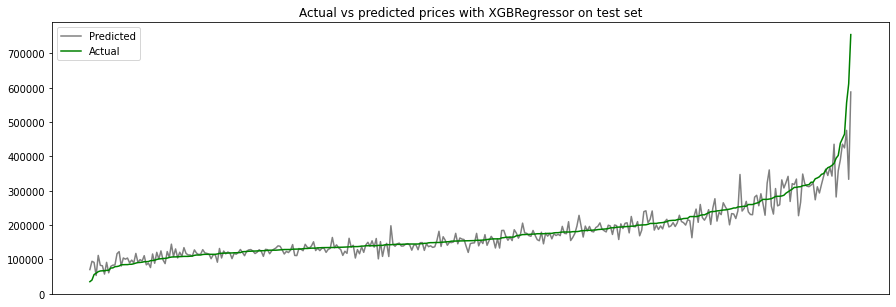

In [117]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

fig,ax = plt.subplots(1, figsize=(15, 5))
ax.plot(predo, 'gray')
ax.plot(actualno, 'green')
ax.legend(['Predicted', 'Actual'])
plt.title("Actual vs predicted prices with XGBRegressor on test set")
ax.set_xticklabels([])
ax.set_xticks([])


plt.show()

-----------

In [ ]:
# Teeme lassoga submissioni 

from sklearn import linear_model

model = linear_model.Lasso(alpha=1, max_iter=45000)

model.fit(X,y)

y_pred = model.predict(X)
# print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) # probably kinda useless since there are so many clases
print("Lasso RMSE:", metrics.mean_squared_error(y, y_pred, squared=False))

<IPython.core.display.Javascript object>

Lasso RMSE: 20690.312694806507


In [ ]:
X_test = df_test.copy()

X_test = feature_eng(X_test)

categorical_columns = X.select_dtypes(exclude=['int64', 'float64'])

X_test = X_test.reindex(columns = X.columns, fill_value=0)

X_test.shape


<IPython.core.display.Javascript object>

(1459, 288)

In [ ]:
predz = model.predict(X_test)

<IPython.core.display.Javascript object>

In [ ]:
# Q1 = df_feat[numerical_columns].quantile(0.03)
# Q3 = df_feat[numerical_columns].quantile(0.97)
# IQR = Q3 - Q1

# df_feat = df_feat[~((df_feat[numerical_columns] < (Q1 - 1.5 * IQR)) |(df_feat[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

<IPython.core.display.Javascript object>

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,0.006849,0.044521,0.010959,0.788356,...,0.414384,0.002055,0.032877,0.009589,0.002055,0.897945,0.001370,0.023973,0.006164,0.004795,0.908219,0.061644,0.020548,0.917808,0.001370,0.001370,0.002055,0.040411,0.036986,0.107534,0.007534,0.001370,0.001370,0.033562,0.000685,0.029452,0.002740,0.001370,0.006164,0.003425,0.003425,0.083562,0.002055,0.867808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.082505,0.206319,0.104145,0.408614,...,0.492784,0.045299,0.178375,0.097486,0.045299,0.302824,0.036999,0.153016,0.078298,0.069100,0.288815,0.240590,0.141914,0.274751,0.036999,0.036999,0.045299,0.196989,0.188793,0.309897,0.086502,0.036999,0.036999,0.180160,0.026171,0.169128,0.052289,0.036999,0.078298,0.058440,0.058440,0.276824,0.045299,0.338815,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [ ]:
columns_to_mess_with = df_feat.select_dtypes(exclude=['int64', 'float64']).nunique()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_feat.select_dtypes(exclude=['int64', 'float64']).nunique()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        7
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          6
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            0
Fence             4
MiscFeature       1
SaleType          9
SaleCondition     6
dtype: int64

In [ ]:
# Ma vaatan iga columni puhul, millel ei ole numbriline väärtus,
# mis mingi unikaalse väärtuse puhul keskmine SalePrice on,
# järjestan nad selle järgi, ja siis asendan numbriga

# for column_name in columns_to_mess_with.keys():

#   mapping_dict = {}

#   for i in df_feat[column_name].unique():
#     mapping_dict[i] = df_feat[df_feat[column_name] == i]['SalePrice'].mean()

#   sorted_dict = sorted(mapping_dict.items(), key=lambda p:p[1])
 
#   replace_dict = {}

#   for s in [(k+1, v) for k, v in enumerate([i[0] for i in sorted_dict])]:
#     # s[0] = numeric value, starting from 1
#     # s[1] = class value, starting from lowest mean saleprice
#     replace_dict[s[1]] = s[0]
#   replace_dict[np.nan] = 0

#   df_feat = df_feat.replace({column_name: replace_dict})

# Actually one hotting is probably a better approach



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_feat.head(5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,4,65.0,8450,2,0,1,3,2,2,2,17,4,5,5,7,7,5,2003,2003,2,3,12,14,3,196.0,3,4,6,3,1,1,6,706,2,0,150,856,6,5,2,5,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,0,5,2003.0,2,2,548,4,5,3,0,61,0,0,0,0,0,0,0,0,2,2008,5,5,208500
1,20,4,80.0,9600,2,0,1,3,2,1,2,20,3,5,5,6,6,8,1976,1976,2,3,7,7,2,0.0,2,4,4,3,1,4,4,978,2,0,284,1262,6,5,2,5,1262,0,0,1262,0,1,2,0,3,1,2,6,7,1,4,5,1976.0,2,2,460,4,5,3,298,0,0,0,0,0,0,0,0,0,5,2007,5,5,181500
2,60,4,68.0,11250,2,0,3,3,2,2,2,17,4,5,5,7,7,5,2001,2002,2,3,12,14,3,162.0,3,4,6,3,1,2,6,486,2,0,434,920,6,5,2,5,920,866,0,1786,1,0,2,1,3,1,3,6,7,1,4,5,2001.0,2,2,608,4,5,3,0,42,0,0,0,0,0,0,0,0,9,2008,5,5,223500
3,70,4,60.0,9550,2,0,3,3,2,3,2,19,4,5,5,7,7,5,1915,1970,2,3,6,6,2,0.0,2,4,2,2,2,1,4,216,2,0,540,756,6,4,2,5,961,756,0,1717,1,0,1,0,3,1,3,7,7,1,5,2,1998.0,1,3,642,4,5,3,0,35,272,0,0,0,0,0,0,0,2,2006,5,2,140000
4,60,4,84.0,14260,2,0,3,3,2,1,2,25,4,5,5,7,8,5,2000,2000,2,3,12,14,3,350.0,3,4,6,3,1,3,6,655,2,0,490,1145,6,5,2,5,1145,1053,0,2198,1,0,2,1,4,1,3,9,7,1,4,5,2000.0,2,3,836,4,5,3,192,84,0,0,0,0,0,0,0,0,12,2008,5,5,250000


## Functions

In [ ]:
def generate_solutions_csv(predictions, results_file):

  results = {}
  for i, v in enumerate(predictions):
    results[1461+i] = v

  res_df = pd.DataFrame()
  results_df = res_df.from_dict(orient='index', data=results, columns=['SalePrice'])

  results_df = results_df.reset_index()
  results_df.columns

  # results_df.reset_index()
  results_df.columns=['Id', 'SalePrice']

  results_df.to_csv(results_file, index=False)

In [ ]:
# https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame


# we dont use it for now idk
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

# numerical_columns = normalize(numerical_columns)

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def RFRegressor(X, y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  model = RandomForestRegressor(max_depth=40,max_features='sqrt',min_samples_leaf=1,min_samples_split=4,n_estimators=5000,random_state=0)
  model.fit(X_train, y_train)

  preds = model.predict(X_test)
  mse = mean_squared_error(preds, y_test, squared=False)

  print("RFRegressor rmse:", mse)

  # making the actual model with all the data
  model = RandomForestRegressor(max_depth=40,max_features='sqrt',min_samples_leaf=1,min_samples_split=4,n_estimators=5000,random_state=0)
  model.fit(X, y)

  return model

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

def LinearRegressionMudel(X, y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  model = LinearRegression()
  model.fit(X_train, y_train)

  preds = model.predict(X_test)
  mse = mean_squared_error(preds, y_test, squared=False)

  print("Linear Regression RMSE:", mse)
  # print("Score:", model.score(X_test, y_test))

  # making the actual model with all the data
  model = LinearRegression()
  model.fit(X, y)

  return model

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

def RandomForestClassifierMudel(X, y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  model = RandomForestClassifier(n_estimators=100)

  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  # print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) # probably kinda useless since there are so many clases
  print("Random Forest RMSE:", metrics.mean_squared_error(y_test, y_pred, squared=False))

  # making the actual model with all the data
  model = RandomForestClassifier(max_depth=40,max_features='sqrt',min_samples_leaf=1,min_samples_split=4, random_state=0)
  model.fit(X, y)

  return model

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.linear_model import Ridge

def RidgeMudel(X, y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  model = Ridge(alpha=0, max_iter=20000)

  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  # print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) # probably kinda useless since there are so many clases
  print("Ridge RMSE:", metrics.mean_squared_error(y_test, y_pred, squared=False))

  # making the actual model with all the data
  model = Ridge(alpha=0, max_iter=20000)
  model.fit(X, y)

  return model

<IPython.core.display.Javascript object>

In [ ]:
from sklearn import linear_model

def LassoMudel(X, y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  model = linear_model.Lasso(alpha=1, max_iter=45000)

  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  # print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) # probably kinda useless since there are so many clases
  print("Lasso RMSE:", metrics.mean_squared_error(y_test, y_pred, squared=False))

  # making the actual model with all the data
  model = linear_model.Lasso(alpha=1, max_iter=45000)
  model.fit(X, y)

  return model

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

def GBCmudel(X, y):

  # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  # model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0, max_features='sqrt')

  # model.fit(X_train,y_train)
  # y_pred = model.predict(X_test)
  # print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) # probably kinda useless since there are so many clases
  # print("Gradient Booster RMSE:", metrics.mean_squared_error(y_test, y_pred, squared=False))

  # making the actual model with all the data
  model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0, max_features='sqrt')
  model.fit(X, y)

  return model

<IPython.core.display.Javascript object>

In [ ]:
import xgboost as xgb

def XGBmudel(X, y):

  # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  # model = xgb.XGBRegressor(verbosity=0, n_estimators=500, random_state=0, objective='reg:squarederror') 

  # model.fit(X_train, y_train)
  # y_pred = model.predict(X_test)

  # print("XGB RMSE:", metrics.mean_squared_error(y_test, y_pred, squared=False))

  # making the actual model with all the data
  model = xgb.XGBRegressor(verbosity=0, n_estimators=500, random_state=0, objective='reg:squarederror') 
  model.fit(X, y)

  return model

<IPython.core.display.Javascript object>

# Analüüs

In [ ]:
# Getting Pearson correlations of any numeric valued columns with SalePrice
correlations = df.corr().iloc[:-1, -1]

<IPython.core.display.Javascript object>

In [ ]:
for i in sorted(correlations.items(), reverse=True, key=lambda p:p[1]):
  print(i)

<IPython.core.display.Javascript object>

('OverallQual', 0.7909816005838047)
('GrLivArea', 0.7086244776126511)
('GarageCars', 0.640409197258349)
('GarageArea', 0.6234314389183598)
('TotalBsmtSF', 0.6135805515591944)
('1stFlrSF', 0.6058521846919166)
('FullBath', 0.5606637627484452)
('TotRmsAbvGrd', 0.5337231555820238)
('YearBuilt', 0.5228973328794967)
('YearRemodAdd', 0.5071009671113867)
('GarageYrBlt', 0.48636167748786213)
('MasVnrArea', 0.4774930470957107)
('Fireplaces', 0.4669288367515242)
('BsmtFinSF1', 0.38641980624215627)
('LotFrontage', 0.35179909657067854)
('WoodDeckSF', 0.32441344456813076)
('2ndFlrSF', 0.31933380283206614)
('OpenPorchSF', 0.31585622711605577)
('HalfBath', 0.2841076755947784)
('LotArea', 0.2638433538714063)
('BsmtFullBath', 0.22712223313149718)
('BsmtUnfSF', 0.214479105546969)
('BedroomAbvGr', 0.1682131543007415)
('ScreenPorch', 0.11144657114291048)
('PoolArea', 0.09240354949187278)
('MoSold', 0.04643224522381936)
('3SsnPorch', 0.04458366533574792)
('BsmtFinSF2', -0.011378121450215216)
('BsmtHalfBath'

<IPython.core.display.Javascript object>

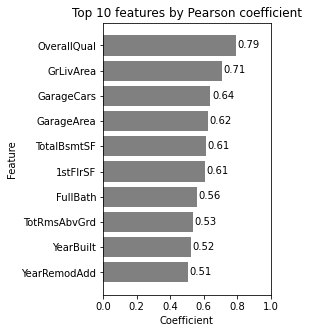

In [ ]:
x, y = zip(*sorted(correlations.items(), reverse=True, key=lambda p:p[1])[:10])

fig, ax = plt.subplots(figsize=(3,5))

# ax.barh(x, y, color='#2CBDFE')
ax.barh(x, y, color='grey')
plt.xlim(0, 1)
plt.ylabel("Feature")
plt.xlabel("Coefficient")
for i, v in enumerate(y):
    # ax.text(v+0.01, i+0.1, str(round(v, 2)), color='#661D98', fontweight='bold')
    ax.text(v+0.01, i+0.1, str(round(v, 2)))

fig.gca().invert_yaxis()



plt.title('Top 10 features by Pearson coefficient')
plt.show()

### Proovin mudeli kaudu .coef-ide võtmist

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

model = LinearRegression()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).drop('Id', axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
numerical_columns.head(5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
numerical_columns = numerical_columns.fillna(numerical_columns.mean())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X = numerical_columns.drop('SalePrice', axis=1)
y = numerical_columns['SalePrice']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.fit(X, y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LinearRegression()

## LinearRegressioni koeffitsendid

In [ ]:
from collections import OrderedDict


importance = model.coef_


importance_dict = OrderedDict()

for i, v in enumerate(importance):
  importance_dict[X.columns[i]] = v

sortimorti = sorted(importance_dict.items(), reverse=True, key = lambda p: p[1])

sortimorti

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[('OverallQual', 17323.840427331877),
 ('GarageCars', 11234.641020581417),
 ('BsmtFullBath', 9359.12950457554),
 ('TotRmsAbvGrd', 5063.413264687483),
 ('OverallCond', 4664.874989163895),
 ('Fireplaces', 3966.4304419509813),
 ('FullBath', 3448.2687996503396),
 ('BsmtHalfBath', 2037.721921125443),
 ('YearBuilt', 271.65036955328577),
 ('YearRemodAdd', 136.0780336196368),
 ('GarageYrBlt', 121.15469159345136),
 ('ScreenPorch', 56.00466838251706),
 ('MasVnrArea', 31.4639297654675),
 ('GrLivArea', 30.891685417995195),
 ('WoodDeckSF', 24.02155419721242),
 ('3SsnPorch', 20.49617261199287),
 ('2ndFlrSF', 18.10156629051371),
 ('1stFlrSF', 18.05829325741962),
 ('EnclosedPorch', 11.826794194944496),
 ('BsmtFinSF1', 10.000856864404524),
 ('TotalBsmtSF', 9.199229606607373),
 ('LotArea', 0.4300135427031969),
 ('BsmtUnfSF', 0.11323660949800898),
 ('MiscVal', -0.7301823831229406),
 ('BsmtFinSF2', -0.9148638630127225),
 ('OpenPorchSF', -2.871141962082196),
 ('GarageArea', -4.236467890624699),
 ('LowQualF

## Korrelatsioonikordajad

In [ ]:
for i in sorted(X.corrwith(y).items(), reverse=True, key=lambda p:p[1]):
  print(i)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

('OverallQual', 0.7909816005838044)
('GrLivArea', 0.7086244776126523)
('GarageCars', 0.6404091972583529)
('GarageArea', 0.6234314389183618)
('TotalBsmtSF', 0.6135805515591956)
('1stFlrSF', 0.6058521846919147)
('FullBath', 0.5606637627484449)
('TotRmsAbvGrd', 0.5337231555820282)
('YearBuilt', 0.5228973328794969)
('YearRemodAdd', 0.5071009671113864)
('MasVnrArea', 0.47524131677366865)
('GarageYrBlt', 0.4701774537404798)
('Fireplaces', 0.4669288367515272)
('BsmtFinSF1', 0.3864198062421532)
('LotFrontage', 0.3349008515405508)
('WoodDeckSF', 0.3244134445681295)
('2ndFlrSF', 0.3193338028320681)
('OpenPorchSF', 0.31585622711605554)
('HalfBath', 0.2841076755947831)
('LotArea', 0.2638433538714057)
('BsmtFullBath', 0.2271222331314938)
('BsmtUnfSF', 0.21447910554696892)
('BedroomAbvGr', 0.16821315430073985)
('ScreenPorch', 0.11144657114291107)
('PoolArea', 0.09240354949187321)
('MoSold', 0.04643224522381938)
('3SsnPorch', 0.04458366533574846)
('BsmtFinSF2', -0.011378121450215127)
('BsmtHalfBath',

### Lineaarregressioonimudel

In [ ]:
def clean_test_for_submission(df):

  numerical_columns = df.select_dtypes(include=['int64', 'float64']).drop('Id', axis=1)

  # numerical_columns = normalize(numerical_columns)

  df_cleaned = numerical_columns.fillna(numerical_columns.mean())

  return df_cleaned

X_test = clean_test_for_submission(df_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X_test.head(5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010


In [ ]:
predictions = model.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
predictions.shape

results = {}

for i, v in enumerate(predictions):
  # print(1461+i, v)
  results[1461+i] = v
  
  #break

res_df = pd.DataFrame()
results_df = res_df.from_dict(orient='index', data=results, columns=['SalePrice'])

results_df = results_df.reset_index()
results_df.columns

# results_df.reset_index()
results_df.columns=['Id', 'SalePrice']

print(results_df.head(5))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

     Id      SalePrice
0  1461  116736.318839
1  1462  151922.627437
2  1463  172780.631631
3  1464  199311.405414
4  1465  195766.224156


In [ ]:
results_df.to_csv('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 4652 / 5393 positsioon

# Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# replace NaN with mean

numerical_columns = df.select_dtypes(include=['int64', 'float64']).drop('Id', axis=1)

numerical_columns = numerical_columns.fillna(numerical_columns.mean())

X = numerical_columns.drop('SalePrice', axis=1)
y = numerical_columns['SalePrice']

clf = RandomForestClassifier(max_depth=8, random_state=0)
clf.fit(X, y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RandomForestClassifier(max_depth=8, random_state=0)

In [ ]:
predictions = clf.predict(X_test)

results = {}

for i, v in enumerate(predictions):
  # print(1461+i, v)
  results[1461+i] = v
  
  #break

res_df = pd.DataFrame()
results_df = res_df.from_dict(orient='index', data=results, columns=['SalePrice'])

results_df = results_df.reset_index()
results_df.columns

# results_df.reset_index()
results_df.columns=['Id', 'SalePrice']

print(results_df.head(5))

results_df.to_csv('submission.csv', index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

     Id  SalePrice
0  1461     110000
1  1462     160000
2  1463     176000
3  1464     185000
4  1465     176000
